# **Resolu√ß√£o Num√©rica em Python da Equa√ß√£o do Movimento Longitudinal do Cessna 152 e Evolu√ß√£o do √Çngulo de Ataque Sob Influ√™ncia de Pequenas Pertuba√ß√µes**
Nome: Ruan Pablo Soares Machado

Professor: Leonardo Guerini

Curso: Engenharia Aeroespacial

---



## 1. Introdu√ß√£o

A Estabilidade pode ser entendida como: a tend√™ncia de uma aeronave de retornar a sua posi√ß√£o de equil√≠brio ap√≥s uma pertuba√ß√£o. A estabilidade longitudinal √© uma das principais caracter√≠sticas din√¢micas da aeronave. Este trabalho visa modelar e simular num√©ricamente a resposta de uma aeronave (Cessna 152) a pequenas pertuba√ß√µes longitudinais, focando na varia√ß√£o do √¢ngulo de ataque 'Œ±' associados √† arfagem(nariz subir ou descer) ao longo do tempo. A din√¢mica longitudinal envolve os movimentos em torno do eixo lateral da aeronave (associados √† arfagem, isto √©, ao "nariz subir ou descer"). O trabalho parte da formula√ß√£o linearizada do movimento longitudinal da aeronave, permitindo ent√£o a aplica√ß√£o de m√©todos num√©ricos de resolu√ß√£o de equa√ß√µes diferenciais ordin√°rias.

## Modelo Longitudinal do Cessna 152

Para estudarmos o comportamento longidutinal, adotamos linearizar a equa√ß√£o do movimento longidudinal da aeronave em torno de um ponto de equilibrio - para uma an√°lise completa da aeronave falamos de 12 equa√ß√µes de movimento que tamb√©m icluem movimentos laterais e verticais e seus modos acoplados -
Dentro do movimento longitudinal, temos o:
Modo Phogoid (oscila√ß√£o-lenta):
Modo short-Period (oscila√ßao r√°pida):
e outras intera√ß√µes com a geometrias da aeronave e controle.

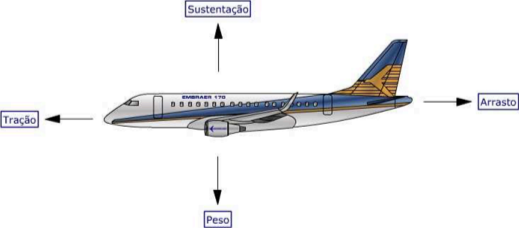

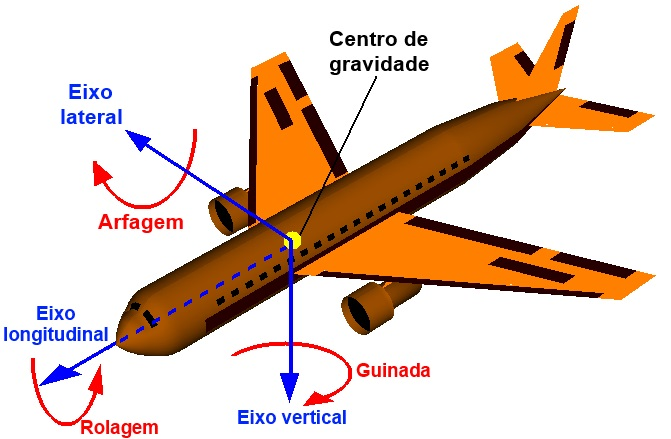

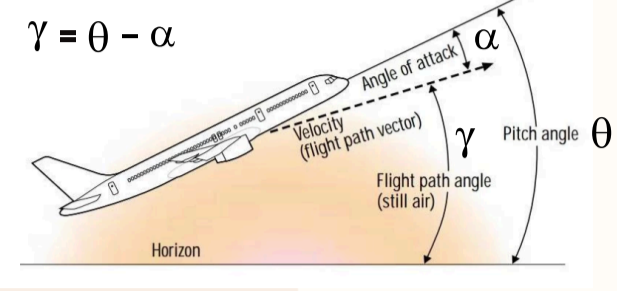

Neste notebook, iremos simular o comportamento **din√¢mico longitudinal** do avi√£o **Cessna 152** frente a pequenas perturba√ß√µes em voo nivelado.

O foco est√° na modelagem e resolu√ß√£o num√©rica das **equa√ß√µes diferenciais ordin√°rias (EDOs)** que descrevem varia√ß√µes em:

- \( U' \): varia√ß√£o da velocidade longitudinal
- \( alpha' \): varia√ß√£o do √¢ngulo de ataque
- \( theta' \): varia√ß√£o da inclina√ß√£o (√¢ngulo de arfagem)
- \( q' \): varia√ß√£o da velocidade angular de arfagem

Essas vari√°veis representam a resposta da aeronave a pequenas perturba√ß√µes em voo, com foco em estabilidade e controle.

O notebook est√° dividido nas seguintes partes:

### 1Ô∏è‚É£ **Defini√ß√£o dos Par√¢metros do Modelo**
Calculamos os coeficientes aerodin√¢micos linearizados com base nos dados f√≠sicos e aerodin√¢micos do Cessna 152 (massa, momento de in√©rcia, coeficientes de sustenta√ß√£o, etc). Isso fornece os termos da matriz din√¢mica do sistema linear.

### 2Ô∏è‚É£ **Defini√ß√£o da Fun√ß√£o do Sistema**
Implementamos a fun√ß√£o `edo_linear(t, y)`, que define as 4 EDOs acopladas de primeira ordem que governam o sistema linearizado. Essa fun√ß√£o ser√° utilizada pelo m√©todo num√©rico para integra√ß√£o.

### 3Ô∏è‚É£ **Condi√ß√µes Iniciais e Integra√ß√£o Num√©rica**
Definimos o vetor de estado inicial \( y_0 \), com uma leve perturba√ß√£o em \( U \) e \( alpha ), e resolvemos o sistema com o m√©todo de **Runge-Kutta de 4¬™ ordem (RK4)** implementado manualmente. Tamb√©m mostramos as constantes \( k_1 \), \( k_2 \), \( k_3 \), \( k_4 \) no **primeiro passo**, como ilustra√ß√£o did√°tica do processo num√©rico.

### 4Ô∏è‚É£ **Resultado da Integra√ß√£o**
A matriz `sol` armazena a evolu√ß√£o temporal de todos os 4 estados ao longo do tempo.

### 5Ô∏è‚É£ **Visualiza√ß√£o Gr√°fica**
Plotamos a evolu√ß√£o temporal das vari√°veis \( U' \), \( alpha' \), \( theta' \), \( q' \) usando gr√°ficos individuais, para analisar visualmente a resposta da aeronave √†s perturba√ß√µes iniciais.


## üîß C√≥digo 1 ‚Äî Par√¢metros da Aeronave e Derivadas Aerodin√¢micas

Neste primeiro bloco, definimos os **par√¢metros f√≠sicos e aerodin√¢micos** do avi√£o Cessna 152, como massa, √°rea da asa, momento de in√©rcia e velocidade de cruzeiro. Esses dados ser√£o usados para calcular as **derivadas dimensionais**, que representam como as for√ßas e momentos aerodin√¢micos variam com as mudan√ßas nos estados do voo (como velocidade, √¢ngulo de ataque e taxa de arfagem).

Essas derivadas s√£o essenciais para compor a **matriz din√¢mica linearizada** do sistema, que descreve o comportamento da aeronave sob pequenas perturba√ß√µes. Ao final do c√≥digo, o script imprime os coeficientes calculados (como (X_u), (Z_Œ±), (Z_q), etc), que servir√£o de base para a formula√ß√£o das equa√ß√µes diferenciais do sistema no pr√≥ximo bloco.

Por fim, poderemos ver a impress√£o dos coeficientes aerodin√¢micos e f√≠sicos que descrevem a din√¢mica longitudinal linearizada da aeronave.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# =======================
# PAR√ÇMETROS DA AERONAVE
# =======================

m = 490.0           # Massa do Cessna 152 em kg
S = 14.86           # √Årea da asa (m¬≤)
c = 1.4             # Corda m√©dia (m)
rho = 1.81          # Densidade do ar (kg/m¬≥) a ~1000 m de altitude
g = 9.81            # Gravidade (m/s¬≤)
Iyy = 1280.0        # Momento de in√©rcia em arfagem ou seja a resistencia √† rota√ß√£o em torno do eixo de arfagem (passagem do nariz) (kg¬∑m¬≤)
V0 = 30.8           # Velocidade de voo de equil√≠brio (m/s)

# Coeficientes aerodin√¢micos t√≠picos do Cessna 152

CD0 = 0.04          # Coeficiente de arrasto parasita (sem sustenta√ß√£o)
CL_alpha = 4.8      # Derivada da sustenta√ß√£o em rela√ß√£o a ao √¢ngulo de ataque (alpha) (1/rad)
CL_q = 3.0          # Derivada da sustenta√ß√£o em rela√ß√£o √† taxa de arfagem q (1/rad)
Cm_alpha = -0.5     # Derivada do momento em rela√ß√£o ao √¢ngulo de ataque (alpha) (1/rad)
Cm_q = -4.0         # Derivada do momento em rela√ß√£o √† taxa de arfagem (q) (1/rad)
theta0 = 0.0        # √Çngulo de inclina√ß√£o de equil√≠brio ou seja √© a inclina√ß√£o da trajet√≥ria no voo em equilib - aqui considerado como nulo (voo nivelado) (rad)

# Esses coeficientes indicam como o avi√£o reage as mudan√ßas em alpha (√¢ngulo de ataque) e q (velocidade angular)

# ===============================
# C√ÅLCULO DAS DERIVADAS DIMENSIONAIS
# ===============================

q_dyn = 0.5 * rho * V0**2  # Press√£o din√¢mica no voo de equil√≠brio

Xu = -(q_dyn * S * 2 * CD0) / (m * V0)                 # Derivada de for√ßa longitudinal em rela√ß√£o a U (velocidade). O c√°lculo aproxima a for√ßa de arrasto como fun√ß√£o da velocidade
Zalpha = -(q_dyn * S * CL_alpha) / m                   # Derivada da for√ßa vertical em rela√ß√£o a alpha - O quanto a for√ßa vertical muda com alpha
Zq = -(q_dyn * S * c * CL_q) / (2 * m * V0)            # Derivada da for√ßa vertical em rela√ß√£o a q - influencia da taxa de arfagem (q) na for√ßa vertical
Ztheta = -g * np.cos(theta0)                           # Componente gravitacional vertical - se o avi√£o estiver inclinado o theta n√£o vai ser mais 0 e sim diferente
Mu = (q_dyn * S * c * Cm_alpha) / Iyy                  # Derivada do momento em rela√ß√£o a alpha - como o angulo de ataque incluencia o momento
Mq = (q_dyn * S * c**2 * Cm_q) / (2 * V0 * Iyy)        # Derivada do momento em rela√ß√£o a q - como a taxa de arfagem influencia o momento


print("Xu = ", Xu)
print("Zalpha = ", Zalpha)
print("Zq = ", Zq)
print("Ztheta = ", Ztheta)
print("Mu = ", Mu)
print("Mq = ", Mq)
print("q_dyn = ", q_dyn)

Xu =  -0.06762573714285715
Zalpha =  -124.97236224
Zq =  -1.7751756
Ztheta =  -9.81
Mu =  -6.97680993625
Mq =  -1.2685108975
q_dyn =  858.5192000000001


## C√≥digo 2 ‚Äî Defini√ß√£o do Sistema de EDOs Linearizadas
##  Equa√ß√µes Din√¢micas Longitudinais (n√£o linearizadas)

O sistema completo da din√¢mica longitudinal de uma aeronave (antes da lineariza√ß√£o) √© dado pelas seguintes equa√ß√µes diferenciais:

\
\begin{cases}
m \frac{dU}{dt} &= -D + T \cos(\alpha) - mg \sin(\theta) \\
m \frac{dW}{dt} &= L + T \sin(\alpha) - mg \cos(\theta) \\
I_{yy} \frac{dq}{dt} &= M \\
\frac{d\theta}{dt} &= q
\end{cases}

Essas equa√ß√µes descrevem a evolu√ß√£o temporal das vari√°veis de estado da aeronave sob a a√ß√£o das for√ßas e momentos aerodin√¢micos e gravitacionais. S√£o elas:

- ( U ) e ( W ): componentes da velocidade no eixo longitudinal e vertical, respectivamente,
- ( Œ± ): √¢ngulo de ataque,
- ( Œ∏ ): √¢ngulo de inclina√ß√£o (pitch),
- ( q ): velocidade angular em arfagem,
- ( D ), ( L ), ( M ): arrasto, sustenta√ß√£o e momento aerodin√¢mico,
- ( T ): empuxo,
- ( m ): massa da aeronave,
- ( I_yy ): momento de in√©rcia em arfagem.

\
**Essas equa√ß√µes representam o modelo f√≠sico completo. No presente trabalho, partimos da sua vers√£o linearizada em torno do ponto de equil√≠brio, para facilitar a an√°lise e simula√ß√£o, relembrando j√° que iremos analisar apenas o movimento longitudinal da aeronave.**

\
Neste bloco, implementamos a fun√ß√£o `edo_linear(t, y)` que representa o **sistema de equa√ß√µes diferenciais ordin√°rias (EDOs)** que governam a din√¢mica longitudinal linearizada do Cessna 152. O vetor de estado ( y = [U', Œ±', Œ∏', q']) cont√©m as quatro vari√°veis que descrevem o comportamento da aeronave frente a pequenas perturba√ß√µes:

\
A lineariza√ß√£o permite separar os efeitos das perturba√ß√µes e escrever um sistema linear com coeficientes constantes

## Sistema de equa√ß√µes diferenciais linearizadas:

\
\begin{cases}
\frac{dU'}{dt} = X_u U' + Z_\alpha \alpha' + Z_q q' + Z_\theta \theta' \\
\frac{d\alpha'}{dt} = q' \\
\frac{d\theta'}{dt} = q' \\
\frac{dq'}{dt} = M_\alpha \alpha' + M_q q'
\end{cases}

\
A fun√ß√£o retorna as derivadas de cada uma dessas vari√°veis no tempo, de acordo com os coeficientes calculados anteriormente (no C√≥digo 1).

\
Essas equa√ß√µes s√£o utilizadas pelo m√©todo de Runge-Kutta no pr√≥ximo bloco para simular numericamente a resposta do avi√£o a uma perturba√ß√£o.

**Resultado esperado:** defini√ß√£o da fun√ß√£o `edo_linear`, que ser√° usada como entrada no m√©todo de integra√ß√£o num√©rica.

O vetor edo_linear(t,y) retorna um vetor com 4 derivadas e, ent√£o usamos y = np.arange((n, 4)) matriz para armazenar todas as solu√ß√µes no tempo e y[i+1] = y[i] + (h6) * (...) para atualizar todos os 4 estado simultaneamente.


\
### Aplica√ß√£o do M√©todo de Runge-Kutta de 4¬™ Ordem para o Sistema Longitudinal

Vamos usar o m√©todo de **Runge-Kutta de 4¬™ ordem** para resolver numericamente o **Problema de Valor Inicial (PVI)** definido por um **sistema de EDOs acopladas**, modelando a din√¢mica longitudinal de uma aeronave (Cessna 152). O sistema √© dado por:

\
\begin{cases}
\dfrac{dU'}{dt} = f_1(U', \alpha', \theta', q') \\
\dfrac{d\alpha'}{dt} = f_2(U', \alpha', \theta', q') \\
\dfrac{d\theta'}{dt} = f_3(U', \alpha', \theta', q') \\
\dfrac{dq'}{dt} = f_4(U', \alpha', \theta', q')
\end{cases}


Ou seja, trata-se de um **sistema com quatro vari√°veis de estado**:

- U' : perturba√ß√£o na velocidade  
- Œ±': perturba√ß√£o no √¢ngulo de ataque  
- Œ∏': perturba√ß√£o no √¢ngulo de inclina√ß√£o  
- q': perturba√ß√£o na velocidade angular de arfagem  

A fun√ß√£o que define a din√¢mica, `edo_linear(t, y)`, recebe o vetor de estados \( y = [U', Œ±', Œ∏', q'] \) e retorna o vetor de derivadas de acordo com o modelo linearizado.

A solu√ß√£o ser√° aproximada usando o m√©todo de Runge-Kutta 4¬™ ordem, com passo fixo \( h = 0,01 \), ao longo do intervalo de 0 a 20 segundos.

A condi√ß√£o inicial √© uma perturba√ß√£o de 0,5 m/s na velocidade e 1¬∞ no √¢ngulo de ataque:

\
\begin{aligned}
y(0) = \begin{bmatrix}
0,5 \\
\text{rad}(1^\circ) \\
0 \\
0
\end{bmatrix}
\end{aligned}




In [ ]:
# =======================
# FUN√á√ÉO DO SISTEMA LINEARIZADO
# =======================

def edo_linear(t, y):
    # y = vetor de estado: [U', alpha', theta', q']
    U, alpha, theta, q = y

    # EDOs linearizadas
    dU_dt = Xu * U + Zalpha * alpha + Ztheta * theta + Zq * q
    dalpha_dt = q                       # d(alpha')/dt = q'
    dtheta_dt = q                       # d(theta')/dt = q'
    dq_dt = Mu * alpha + Mq * q         # d(q')/dt = M_alpha * alpha' + M_q * q'

    return [dU_dt, dalpha_dt, dtheta_dt, dq_dt]

### Interpreta√ß√£o do Primeiro Passo de Runge-Kutta de 4¬™ Ordem

Antes de resolver numericamente todo o sistema usando o m√©todo de Runge-Kutta de 4¬™ ordem, realizamos manualmente o **primeiro passo da integra√ß√£o**, utilizando os valores reais do modelo linearizado do Cessna 152.

#### Condi√ß√£o inicial:
\[
y_0 =
\begin{bmatrix}
0{,}5 \text{ m/s} \\
1^\circ = 0{,}01745 \text{ rad} \\
0 \\
0
\end{bmatrix}
\]

---

#### C√°lculo dos coeficientes intermedi√°rios:

\
k_1 =
\begin{bmatrix}
-2{,}215 \\
0 \\
0 \\
-0{,}1218
\end{bmatrix}



k_2 =
\begin{bmatrix}
-2{,}213 \\
-0{,}00061 \\
-0{,}00061 \\
-0{,}1210
\end{bmatrix}



k_3 =
\begin{bmatrix}
-2{,}213 \\
-0{,}000605 \\
-0{,}000605 \\
-0{,}1210
\end{bmatrix}


\
k_4 =
\begin{bmatrix}
-2{,}211 \\
-0{,}00121 \\
-0{,}00121 \\
-0{,}1202
\end{bmatrix}


---

#### Resultado do pr√≥ximo passo:

\
y_1
\begin{bmatrix}
0{,}478 \\
0{,}01745 \\
-6 \cdot 10^{-6} \\
-0{,}00121
\end{bmatrix}


---
Tamb√©m estabelecemos o intervalo de simula√ß√£o de 0 a 20 segundos, com passo de integra√ß√£o \( h = 0,01 \) s, totalizando 2000 pontos.

A seguir, aplicamos o m√©todo de Runge-Kutta de quarta ordem para resolver numericamente o sistema de equa√ß√µes diferenciais implementada anteriormente. Este m√©todo fornece uma solu√ß√£o precisa mesmo para sistemas n√£o triviais, como √© o caso da din√¢mica de voo linearizada.

A fun√ß√£o `runge_kutta` recebe a fun√ß√£o que define o sistema (`edo_linear`), o vetor de tempo, a condi√ß√£o inicial e o passo \( h \), e *retorna uma matriz com a evolu√ß√£o de todos os estados ao longo do tempo.*

Al√©m disso, imprimimos os vetores \( k_1, k_2, k_3, k_4 \) e o resultado \( y_1 \) do primeiro passo de Runge-Kutta, como uma forma de **verifica√ß√£o manual** do c√°lculo.

---

### An√°lise F√≠sica do Resultado

J√° no primeiro passo, observamos que:
- A **velocidade perturbada** \( U' \) come√ßa a **diminuir**. A velocidade longitudinal caiu levmente de 0.5 -> 0.478ms;
- A inclina√ß√£o \( theta' \) torna-se **levemente negativa**, indicando uma tend√™ncia de **descida**;
- A velocidade angular \( q' \) tamb√©m fica **negativa**, indicando um **movimento de arfagem para baixo** (momento picado), indicando manobra suave de estabiliza√ß√£o.

Esses efeitos s√£o **coerentes com uma resposta natural est√°vel** do avi√£o ap√≥s uma perturba√ß√£o suave no √¢ngulo de ataque.



In [ ]:
# =======================
# CONDI√á√ïES INICIAIS E SIMULA√á√ÉO
# =======================

# Pequena perturba√ß√£o inicial no √¢ngulo de ataque (1 grau ‚âà 0.017 rad) e pertuba√ß√£o de 0.5ms na velocidade
# Os estados (theta0 e q0) come√ßam em zero.
y0 = np.array([0.5, np.radians(1.0), 0.0, 0.0]) #[U0 , alpha0, theta0, q0]

# Intervalo de tempo da simula√ß√£o
t = np.arange(0, 20, 0.01)

# =======================
# M√âTODO DE RUNGE-KUTTA DE 4¬™ ORDEM
# =======================

def runge_kutta(f, t, y0, h):
# Inicia o vetor solu√ß√£o y com zeros e aplica a condi√ß√£o inicial y0
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
# Aplicando RK4 para resolver as EDOs num√©ricamente
# Vai ser usada a m√©dia ponderada de quatro aproxima√ß√µes para obter a pr√≥xima posi√ß√£o no tempo
    for i in range(n-1):
        k1 = np.array(f(t[i], y[i]))
        k2 = np.array(f(t[i] + h/2, y[i] + h/2 * k1))
        k3 = np.array(f(t[i] + h/2, y[i] + h/2 * k2))
        k4 = np.array(f(t[i] + h, y[i] + h * k3))
        if i == 0:  # imprimir s√≥ no primeiro passo
          print("Passo 1 (t = {:.2f}):".format(t[i]))
          print("k1 =", k1)
          print("k2 =", k2)
          print("k3 =", k3)
          print("k4 =", k4)
          print("y1 =", y[i] + (h/6) * (k1 + 2*k2 + 2*k3 + k4))
        y[i+1] = y[i] + (h/6) * (k1 + 2*k2 + 2*k3 + k4) #Atualiza o indice

    return y # Retorna o vetor solu√ß√£o ao longo do tempo

# Resolvendo o sistema com Runge-Kutta com a fun√ß√£o de integra√ß√£o numerica
sol = runge_kutta(edo_linear, t, y0, 0.01)

Passo 1 (t = 0.00):
k1 = [-2.21499206  0.          0.         -0.1217683 ]
k2 = [-2.21316231e+00 -6.08841523e-04 -6.08841523e-04 -1.20995983e-01]
k3 = [-2.21275948e+00 -6.04979913e-04 -6.04979913e-04 -1.20979642e-01]
k4 = [-2.21053266e+00 -1.20979642e-03 -1.20979642e-03 -1.20191456e-01]
y1 = [ 4.77871053e-01  1.74472301e-02 -6.06239882e-06 -1.20985168e-03]


Ap√≥s resolver o sistema de equa√ß√µes diferenciais com o m√©todo de Runge-Kutta de 4¬™ ordem, a matriz sol cont√©m a solu√ß√£o temporal aproximada do sistema din√¢mico da aeronave.

O comando print(sol) exibe essa matriz, onde:

Cada linha representa um instante de tempo tùëñ;

Cada coluna representa uma vari√°vel de estado:

sol(tùëñ)= [ùëà‚Ä≤(ùë°ùëñ) ùõº‚Ä≤(ùë°ùëñ)  ùúÉ‚Ä≤(ùë°ùëñ)  ùëû‚Ä≤(ùë°ùëñ) ]



In [ ]:
print(sol)

[[ 5.00000000e-01  1.74532925e-02  0.00000000e+00  0.00000000e+00]
 [ 4.77871053e-01  1.74472301e-02 -6.06239882e-06 -1.20985168e-03]
 [ 4.55794677e-01  1.74291491e-02 -2.41433988e-05 -2.40361449e-03]
 ...
 [ 1.90732142e+00  4.35216359e-08 -1.74532490e-02 -1.20987461e-07]
 [ 1.90774355e+00  4.23044252e-08 -1.74532502e-02 -1.22437461e-07]
 [ 1.90816540e+00  4.10732306e-08 -1.74532514e-02 -1.23784305e-07]]


Ap√≥s a simula√ß√£o num√©rica com o m√©todo de Runge-Kutta, os resultados s√£o armazenados em uma matriz sol, com cada linha representando os valores das vari√°veis de estado em um determinado instante de tempo.

Este bloco de c√≥digo utiliza o pacote matplotlib para visualizar a evolu√ß√£o no tempo das perturba√ß√µes nas quatro vari√°veis do sistema din√¢mico longitudinal da aeronave.

Esses gr√°ficos ajudam a interpretar visualmente como a aeronave responde a pequenas perturba√ß√µes iniciais, fornecendo uma no√ß√£o clara dos modos de movimento (como o modo de per√≠odo curto e o modo flog√≥ide).

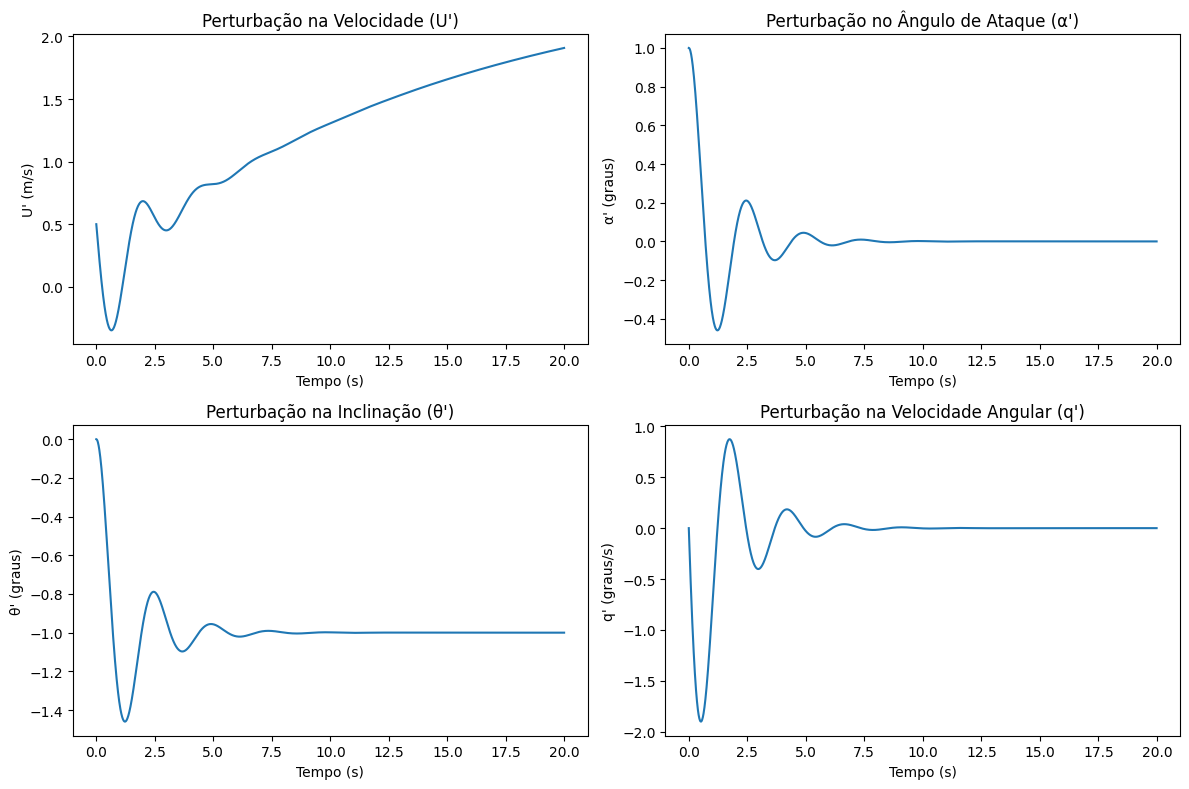

In [ ]:
# =======================
# PLOTAGEM DOS RESULTADOS
# =======================

plt.figure(figsize=(12, 8))
# Aqui os subplots ir√£o exibir a evolu√ß√£o no tempo de uma vari√°vel de estado

# Velocidade U'
plt.subplot(2, 2, 1)
plt.plot(t, sol[:, 0]) # vetor tempo e a primeira coluna da matriz sol (primeiro estado do sistema)
plt.title("Perturba√ß√£o na Velocidade (U')")
plt.xlabel("Tempo (s)")
plt.ylabel("U' (m/s)") # Pertuba√ß√£o na velocidade ao longo do tempo

# √Çngulo de ataque Œ±'
plt.subplot(2, 2, 2)
plt.plot(t, np.degrees(sol[:, 1])) # plotando o vetor tempo e todos os valores da segunda coluna da matriz sol (alpha de radianos pra graus)
plt.title("Perturba√ß√£o no √Çngulo de Ataque (Œ±')")
plt.xlabel("Tempo (s)")
plt.ylabel("Œ±' (graus)")

# √Çngulo de inclina√ß√£o Œ∏'
plt.subplot(2, 2, 3)
plt.plot(t, np.degrees(sol[:, 2]))
plt.title("Perturba√ß√£o na Inclina√ß√£o (Œ∏')")
plt.xlabel("Tempo (s)")
plt.ylabel("Œ∏' (graus)")

# Velocidade angular q'
plt.subplot(2, 2, 4)
plt.plot(t, np.degrees(sol[:, 3]))
plt.title("Perturba√ß√£o na Velocidade Angular (q')")
plt.xlabel("Tempo (s)")
plt.ylabel("q' (graus/s)")

plt.tight_layout()
plt.show()


## Interpreta√ß√£o dos Resultados da Simula√ß√£o
A partir dos quatro gr√°ficos gerados, √© poss√≠vel entender como a aeronave Cessna 152 se comporta ap√≥s uma pequena perturba√ß√£o no voo nivelado:

- ùëà'(t) ‚Äì Velocidade Longitudinal

Ap√≥s a perturba√ß√£o de +0.5 m/s, observa-se uma oscila√ß√£o suave na velocidade ao longo do tempo. Isso reflete a troca de energia entre velocidade e altitude (caracter√≠stica do modo flog√≥ide), t√≠pica de sistemas com baixa frequ√™ncia e baixo amortecimento.

- ùõº'(t) ‚Äì √Çngulo de Ataque

Uma pequena perturba√ß√£o inicial em  desencadeia uma resposta oscilat√≥ria amortecida, indicando um modo de per√≠odo curto: varia√ß√µes r√°pidas e bem amortecidas no nariz da aeronave, mantendo a estabilidade.

- ùúÉ'(t) ‚Äì √Çngulo de Inclina√ß√£o (Arfagem)

O √¢ngulo de arfagem tamb√©m oscila como consequ√™ncia da perturba√ß√£o em
ùõº, pois ambos est√£o acoplados. Sua evolu√ß√£o mostra a trajet√≥ria do nariz da aeronave ao longo do tempo, tendendo a se estabilizar.

- q'(t) ‚Äì Velocidade Angular em Arfagem

O momento angular do avi√£o responde rapidamente √† perturba√ß√£o inicial, com uma oscila√ß√£o que tamb√©m se amortiza ao longo do tempo. Isso est√° diretamente relacionado ao modo de per√≠odo curto e ao momento de arfagem.



## Representa√ß√£o do Sistema com Matriz A

Nosso sistema de equa√ß√µes diferenciais (modelo linearizado do movimento longitudinal) pode ser representado de forma vetorial como:


$\frac{d}{dt}$
\begin{bmatrix}
U' \\
\alpha' \\
\theta' \\
q'
\end{bmatrix}
=
$A \cdot x$
\begin{bmatrix}
U' \\
\alpha' \\
\theta' \\
q'
\end{bmatrix}


Onde:

- \( U' \): perturba√ß√£o na velocidade
- \( \alpha' \): perturba√ß√£o no √¢ngulo de ataque
- \( \theta' \): perturba√ß√£o na inclina√ß√£o da aeronave
- \( q' \): perturba√ß√£o na velocidade angular (arfagem)
- \( A \): matriz dos coeficientes do sistema linearizado

A matriz \( A \) √© dada por:


\
A =
\begin{bmatrix}
X_u & Z_\alpha & Z_\theta & Z_q \\
0 & 0 & 0 & 1 \\
0 & 0 & 0 & 1 \\
0 & M_\alpha & 0 & M_q
\end{bmatrix}


Essa matriz ùê¥ representa a din√¢mica linearizada do movimento longitudinal da aeronave Cessna 152, em torno de um ponto de equil√≠brio (voo nivelado e retil√≠neo). Cada termo dela expressa como uma vari√°vel influencia a outra ao longo do tempo. √â o modelo de espa√ßo de estados, e tem o papel de "ditar" a evolu√ß√£o dos quatro estados do sistema:

---

###  Implementa√ß√£o em Python

No Python, usamos `numpy` para definir essa matriz e o vetor de estado \( x \):

```python
A = np.array([
    [Xu, Zalpha, Ztheta, Zq],
    [0,  0,      0,      1],
    [0,  0,      0,      1],
    [0,  Mu,     0,     Mq]
])

x = np.array([U, alpha, theta, q])
f = A @ x


In [ ]:
import sympy as sp

In [ ]:
# Din√¢mica Longitudinal - Cessna 152

In [ ]:
# =============================================================
# DEFINI√á√ÉO DO SISTEMA DE EDOs LINEARIZADAS
# =============================================================
# f = (U', alpha', theta', q') = A @ x
# f √© o vetor de derivadas de estado do sistema.
# A √© a matriz de coeficientes do sistema linearizado (matriz jacobiana)
# x √© o vetor de estado com U', a', 0', q'
#O sistema de EDO lineares √© representado
def f(U, alpha, theta, q):
    dU_dt     = Xu * U + Zalpha * alpha + Ztheta * theta + Zq * q
    dalpha_dt = q
    dtheta_dt = q
    dq_dt     = Mu * alpha + Mq * q
    return np.array([dU_dt, dalpha_dt, dtheta_dt, dq_dt])

Nesse trecho do c√≥digo ira ser gerado e plotado o campo de vetores no plano de fase (Œ±,q), que representa graficamente como o sistema din√¢mico evolui no espa√ßo de estados reduzido, ou seja, focando s√≥ no √¢ngulo de ataque (Œ±) e na velocidade angular em arfagem (q).

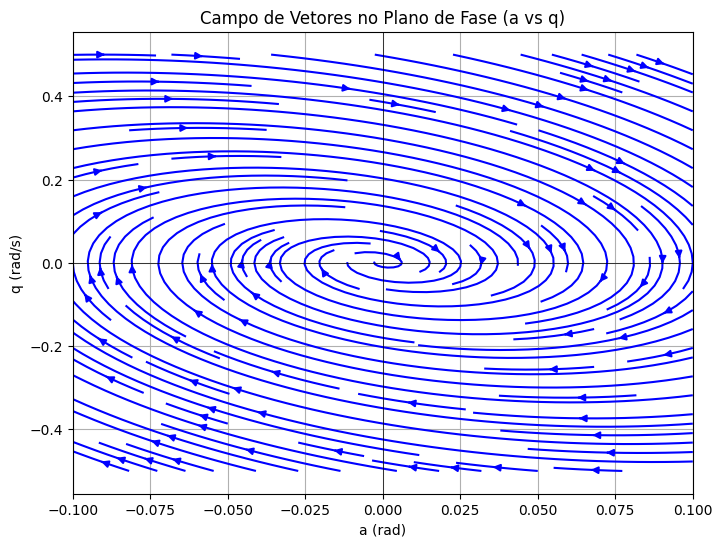

In [ ]:
# =============================================================
# PLOTAGEM DO CAMPO DE VETORES NO PLANO (alpha, q)

# Criando malha do plano (alpha, q)
# Grade de -0.1 a 0.1 rad apar alpha
# Grade de -0.5 a 0.5 rad/s para q
alpha_vals = np.linspace(-0.1, 0.1, 20)  # rad
q_vals = np.linspace(-0.5, 0.5, 20)      # rad/s

alpha_grid, q_grid = np.meshgrid(alpha_vals, q_vals)
dalpha_grid = np.zeros_like(alpha_grid)
dq_grid = np.zeros_like(q_grid)

# Consideramos U=0, theta=0 para o plano reduzido
for i in range(alpha_grid.shape[0]):
    for j in range(alpha_grid.shape[1]):
        a = alpha_grid[i, j]
        qv = q_grid[i, j]
        derivs = f(0.0, a, 0.0, qv) # Calculo das derivadas para cada ponto da malha, vai retornar os valores da alpha' e q'
        dalpha_grid[i, j] = derivs[1]  # dalpha/dt = q
        dq_grid[i, j] = derivs[3]      # dq/dt = Mu*alpha + Mq*q

plt.figure(figsize=(8, 6))
plt.streamplot(alpha_vals, q_vals, dalpha_grid, dq_grid, color='blue', density=1.5) # Linhas de corrente, o sistema evolui com o tempo naquele ponto do espa√ßo de fase.
plt.xlabel("a (rad)")
plt.ylabel("q (rad/s)")
plt.title("Campo de Vetores no Plano de Fase (a vs q)")
plt.grid(True)
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.show()


## Interpreta√ß√£o f√≠sica
Cada flecha mostra como o par
(ùõº, ùëû) se move ao longo do tempo. Com isso, voc√™ pode observar:

- Se o sistema √© est√°vel (vetores convergem para a origem).

- O tipo de oscila√ß√£o (modo peri√≥dico, amortecido, etc).

- Se existe amortecimento ou instabilidade.

# Simulando uma pertuba√ß√£o no √¢ngulo de ataque (ùõº)
O trecho abaixo ir√° sobrepor a trajet√≥ria real de uma solu√ß√£o espec√≠fica (obtida via Runge-Kutta) sobre o campo de vetores que j√° foi desenhado anteriormente. Com isso,  conseguimos visualizar a evolu√ß√£o exata do sistema no plano de fase (Œ±,q) a partir de uma condi√ß√£o inicial.

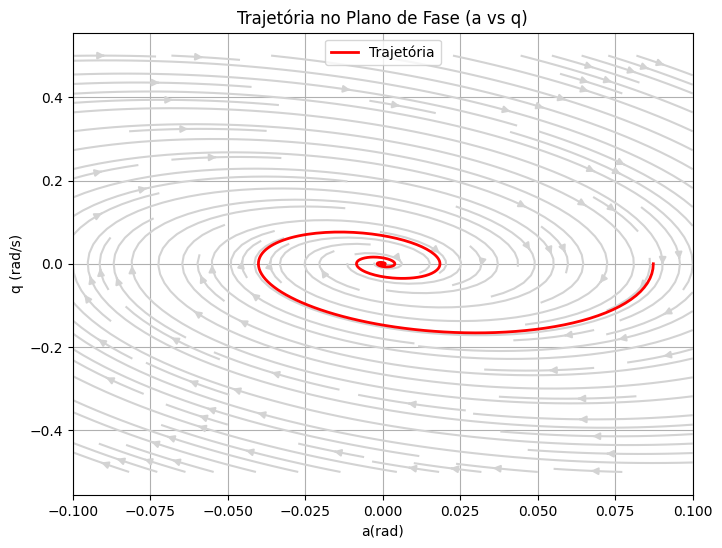

In [ ]:
# =============================================================
# TRAJET√ìRIA DE UMA SOLU√á√ÉO PARTICULAR (Runge-Kutta)
# =============================================================
def runge_kutta(f, t, y0, h):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        k1 = f(*y[i])
        k2 = f(*(y[i] + h/2 * k1))
        k3 = f(*(y[i] + h/2 * k2))
        k4 = f(*(y[i] + h * k3))
        y[i+1] = y[i] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    return y

# Condi√ß√£o inicial: perturba√ß√£o em alpha (angulo de ataque)
y0 = [0.0, np.radians(5.0), 0.0, 0.0]
t = np.linspace(0, 20, 1000)
# Armazena todos os valores da solu√ß√£o no vetor sol.
sol = runge_kutta(f, t, y0, t[1] - t[0])

# Trajet√≥ria no plano alpha x q
plt.figure(figsize=(8, 6))
plt.streamplot(alpha_vals, q_vals, dalpha_grid, dq_grid, color='lightgray', density=1.5) # Vetores no fundo
plt.plot(sol[:, 1], sol[:, 3], 'r', linewidth=2, label="Trajet√≥ria") # Linha real da trajet√≥ria no plano (ùõº, q)
plt.xlabel("a(rad)")
plt.ylabel("q (rad/s)")
plt.title("Trajet√≥ria no Plano de Fase (a vs q)")
plt.legend()
plt.grid(True)
plt.show()

## Interpreta√ß√£o
Esse gr√°fico mostra como o sistema se move no plano de fase (Œ±,q) partindo de uma perturba√ß√£o inicial. A curva vermelha segue exatamente a din√¢mica do avi√£o, enquanto o campo de vetores mostra a tend√™ncia geral de todos os estados poss√≠veis.

Se a curva espirala para o centro, h√° estabilidade amortecida (ex: modo de per√≠odo curto). Se ela se afasta, h√° instabilidade.

# An√°lise dos Autovalores e Autovetores da Matriz da Din√¢mica de Voo

A matriz ùê¥ representa a din√¢mica linearizada da aeronave em torno do ponto de equil√≠brio. Quando calculamos os autovalores de ùê¥, estamos descobrindo como o sistema reage √†s perturba√ß√µes, se volta ao equil√≠brio, se oscila, se cresce inst√°vel...

In [ ]:
# =============================================================
# AUTOVALORES E AUTOVETORES DA MATRIZ A
# =============================================================
A = sp.Matrix([
    [Xu, Zalpha, Ztheta, Zq],
    [0,     0,       0,   1],
    [0,     0,       0,   1],
    [0,    Mu,       0,  Mq]
])

sp.init_printing()
print("Matriz A do sistema:")
display(A)

print("\nAutovalores e autovetores:")
A.eigenvects()


Matriz A do sistema:


‚é°-0.0676257371428571  -124.97236224   -9.81   -1.7751756  ‚é§
‚é¢                                                         ‚é•
‚é¢         0                 0           0          1      ‚é•
‚é¢                                                         ‚é•
‚é¢         0                 0           0          1      ‚é•
‚é¢                                                         ‚é•
‚é£         0           -6.97680993625    0    -1.2685108975‚é¶


Autovalores e autovetores:


‚é°‚éõ                        ‚é°‚é°1.0‚é§‚é§‚éû  ‚éõ      ‚é°‚é°       -1.0        ‚é§‚é§‚éû  ‚éõ         ‚Ü™
‚é¢‚éú                        ‚é¢‚é¢   ‚é•‚é•‚éü  ‚éú      ‚é¢‚é¢                   ‚é•‚é•‚éü  ‚éú         ‚Ü™
‚é¢‚éú                        ‚é¢‚é¢ 0 ‚é•‚é•‚éü  ‚éú      ‚é¢‚é¢         0         ‚é•‚é•‚éü  ‚éú         ‚Ü™
‚é¢‚éú-0.0676257371428571, 1, ‚é¢‚é¢   ‚é•‚é•‚éü, ‚éú0, 1, ‚é¢‚é¢                   ‚é•‚é•‚éü, ‚éú-0.63425 ‚Ü™
‚é¢‚éú                        ‚é¢‚é¢ 0 ‚é•‚é•‚éü  ‚éú      ‚é¢‚é¢0.00689355118683559‚é•‚é•‚éü  ‚éú         ‚Ü™
‚é¢‚éú                        ‚é¢‚é¢   ‚é•‚é•‚éü  ‚éú      ‚é¢‚é¢                   ‚é•‚é•‚éü  ‚éú         ‚Ü™
‚é£‚éù                        ‚é£‚é£ 0 ‚é¶‚é¶‚é†  ‚éù      ‚é£‚é£         0         ‚é¶‚é¶‚é†  ‚éù         ‚Ü™

‚Ü™                                 ‚é°‚é°  -0.051359791580488 + 0.113197069235044‚ãÖ‚Öà ‚Ü™
‚Ü™                                 ‚é¢‚é¢                                           ‚Ü™
‚Ü™                                 ‚é¢‚

Polos do sistema:
Polo 1: -0.0676+0.0000j
Polo 2: 0.0000+0.0000j
Polo 3: -0.6343+2.5641j
Polo 4: -0.6343-2.5641j


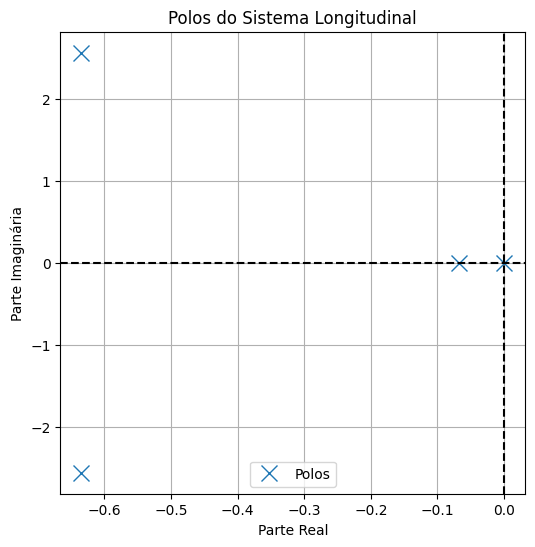

In [ ]:

# =======================
# C√ÅLCULO E PLOTAGEM DOS P√ìLOS
# =======================
#A matriz A representa o sistema linearizado no formato x= Ax, e seus autovalores (polos) indicam se o sistema vai ser est√°vel (parte real negativa) ou inst√°vel
A = np.array([
    [Xu,     Zalpha, Ztheta, Zq], # 1¬™ linha: (derivadas for√ßa longitudinal)
    [0,         0,      0,    1], # 2¬™ linha: Rela√ß√£o entre theta' e q
    [0,         0,      0,    1], # 3¬™ linha: Aten√ß√£o: essa linha √© repetida e pode ser um erro - geralmente dtheta/dt = q, mas d(alpha)/dt n√£o √© 1 * q
    [0,        Mu,      0,   Mq]
])
polos = np.linalg.eigvals(A) # Calcula os autovalores (polos) do sistema

print("Polos do sistema:")
for i, p in enumerate(polos):
    print(f"Polo {i+1}: {p:.4f}")

plt.figure(figsize=(6,6))
plt.plot(polos.real, polos.imag, 'x', markersize=12, label='Polos')
plt.axvline(0, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imagin√°ria')
plt.title('Polos do Sistema Longitudinal')
plt.grid(True)
plt.legend()
plt.show()

#Conclus√£o

Neste trabalho, modelamos a din√¢mica longitudinal linearizada da aeronave Cessna 152 sob pequenas perturba√ß√µes em torno de um ponto de equil√≠brio em voo nivelado. O sistema foi descrito por quatro vari√°veis de estado: perturba√ß√µes na velocidade
ùëà', √¢ngulo de ataque  ùõº', √¢ngulo de inclina√ß√£o ùúÉ e velocidade angular de arfagem q'.

A partir dos par√¢metros f√≠sicos e aerodin√¢micos do modelo, obtivemos as derivadas de estabilidade, que compuseram a matriz din√¢mica ùê¥ do sistema linearizado. Em seguida, implementamos uma simula√ß√£o num√©rica via m√©todo de Runge-Kutta de 4¬™ ordem, analisando a resposta temporal do sistema para uma condi√ß√£o inicial com pequenas perturba√ß√µes.

Al√©m disso, representamos graficamente o campo de vetores no plano de fase (ùõº,ùëû)
, evidenciando o comportamento din√¢mico ao redor do equil√≠brio. Foi poss√≠vel observar uma trajet√≥ria t√≠pica de retorno est√°vel, com oscila√ß√µes amortecidas, representando a resposta natural da aeronave a dist√∫rbios suaves.

A an√°lise dos autovalores da matriz ùê¥ confirmou a presen√ßa dos dois modos cl√°ssicos da din√¢mica longitudinal:

- Um modo oscilat√≥rio amortecido (com autovalores complexos conjugados), que representa o modo de per√≠odo curto da aeronave;

- Um modo real negativo mais lento, associado ao amortecimento suave do modo phugoid.

Esses resultados mostram que o sistema √© est√°vel, pois todos os autovalores possuem parte real negativa, e que a resposta natural do Cessna 152 tende ao equil√≠brio ap√≥s uma perturba√ß√£o.

<center>
  <img src="(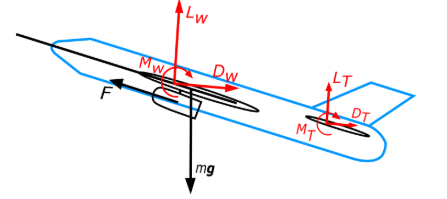)" width="300"/>
</center>